<a href="https://colab.research.google.com/github/tuxsy/iebs-master-data-science/blob/main/m04/c2/sprint/SaludFeto_AlgoritmoNaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/tuxsy/iebs-master-data-science/main/notebook_banner.png" width="1024" style="float:center">
<div style="margin-top:10px; display:flex; align-items:center;">
    <div style="float:left; margin-right:10px;vertical-align:middle">
        <a href="https://www.linkedin.com/in/bruno-angles/" targer="_blank">
            <img src="https://raw.githubusercontent.com/tuxsy/iebs-master-data-science/main/lkin-logo.png"/>
        </a>
    </div>
    <div> 
        Bruno Anglés (17/01/2022)
    </div>
 </div>

 # Ajuste Algoritmo Naive Bayes

In [1]:
# IMPORTACION DE LIBRERIAS
import numpy as np
import pandas as pd

# LIBRERIAS PARA HACER GRAFICOS
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as xp

# ESTILO DE LOS GRÁFICOS
plt.style.use('ggplot')

params = {'axes.titlesize':'10'}
plt.rcParams.update(params)

plt_colors = list(sns.color_palette().as_hex())

def plt_color(i):
    return plt_colors[i % len(plt_colors)]


## Carga del fichero de datos

In [2]:
! [ -f ASI_casoPractico.csv ] || wget https://raw.githubusercontent.com/tuxsy/iebs-master-data-science/main/m04/c2/sprint/ASI_casoPractico.csv

data = pd.read_csv("ASI_casoPractico.csv", sep=";")

data.head()

--2023-01-17 20:35:42--  https://raw.githubusercontent.com/tuxsy/iebs-master-data-science/main/m04/c2/sprint/ASI_casoPractico.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167523 (164K) [text/plain]
Saving to: ‘ASI_casoPractico.csv’

ASI_casoPractico.cs 100%[===================>] 163.60K  --.-KB/s    in 0.03s   

2023-01-17 20:35:43 (6.06 MB/s) - ‘ASI_casoPractico.csv’ saved [167523/167523]



,ID,b,e,LBE,AC,FM,UC,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,1,240,357,120,0,0,0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,1
1,2,5,632,132,4,0,4,17,2.1,0,...,68,198,6,1,141,136,140,12,0,0
2,3,177,779,133,2,0,5,16,2.1,0,...,68,198,5,1,141,135,138,13,0,0
3,4,411,1192,134,2,0,6,16,2.4,0,...,53,170,11,0,137,134,137,13,1,0
4,5,533,1147,132,4,0,5,16,2.4,0,...,53,170,9,0,137,136,138,11,1,0


## Análisis exploratorio

### Información del conjunto de datos

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2126 non-null   int64  
 1   b         2126 non-null   int64  
 2   e         2126 non-null   int64  
 3   LBE       2126 non-null   int64  
 4   AC        2126 non-null   int64  
 5   FM        2126 non-null   int64  
 6   UC        2126 non-null   int64  
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  DL        2126 non-null   int64  
 12  DS        2126 non-null   int64  
 13  DP        2126 non-null   int64  
 14  DR        2126 non-null   int64  
 15  Width     2126 non-null   int64  
 16  Min       2126 non-null   int64  
 17  Max       2126 non-null   int64  
 18  Nmax      2126 non-null   int64  
 19  Nzeros    2126 non-null   int64  
 20  Mode      2126 non-null   int6

### Valores únicos

In [4]:
data.agg(["nunique"]).T

,nunique
ID,2126
b,979
e,1064
LBE,48
AC,22
FM,96
UC,19
ASTV,75
MSTV,57
ALTV,87


### Eliminar columnas innecesarias

In [5]:
data = data.drop(["ID","b","e","DR"], axis = 1)
data.head()

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,120,0,0,0,73,0.5,43,2.4,0,0,...,62,126,2,0,120,137,121,73,1,1
1,132,4,0,4,17,2.1,0,10.4,2,0,...,68,198,6,1,141,136,140,12,0,0
2,133,2,0,5,16,2.1,0,13.4,2,0,...,68,198,5,1,141,135,138,13,0,0
3,134,2,0,6,16,2.4,0,23.0,2,0,...,53,170,11,0,137,134,137,13,1,0
4,132,4,0,5,16,2.4,0,19.9,0,0,...,53,170,9,0,137,136,138,11,1,0


### Valores missing - nulos

In [6]:
data.isnull().sum()

LBE         0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
Target      0
dtype: int64

### Clasificación de variable

In [7]:
# Tipos de variables contenidos en el dataset
list(data.dtypes.unique())

[dtype('int64'), dtype('float64')]

Todas las varaibles del daset son numéricas y cuantitativas, se clasificarán del siguiente modo atendiendo a los valores que toman dichas variables:


*   contínuas
*   discretas

In [8]:
# Variables cuantitativas
DISCRETE_VARS = [
  "DS", # {0, 1}
  "DP", # {0, 1, 2, 3, 4}
  "Tendency" # {-1, 0, 1}
]


CONTINUOUS_VARS = [col for col in data.columns if col not in DISCRETE_VARS and col != "Target"]
print("Variables contínuas:", CONTINUOUS_VARS)
print("Variables discretas:", DISCRETE_VARS)

# Nos aseguramos que todas las variables del Data Frame están clasificadas
assert len([col for col in data.columns if col not in CONTINUOUS_VARS + DISCRETE_VARS]) == 1 # La variable objetivo no está clasificada

Variables contínuas: ['LBE', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance']
Variables discretas: ['DS', 'DP', 'Tendency']


In [9]:
# Valores que toman las variables discretas
data[DISCRETE_VARS].agg(["nunique",set]).T

,nunique,set
DS,2,"{0, 1}"
DP,5,"{0, 1, 2, 3, 4}"
Tendency,3,"{0, 1, -1}"


Consideramos tres variables como discretas atendiendo al conjunto limitado de valores que puede tomar. El resto de variables se consideran contínuas.

In [10]:
# Comprobación del rango de las variables contínuas
data[CONTINUOUS_VARS].agg(["min", "max"]).T

,min,max
LBE,106.0,160.0
AC,0.0,26.0
FM,0.0,564.0
UC,0.0,23.0
ASTV,12.0,87.0
MSTV,0.2,7.0
ALTV,0.0,91.0
MLTV,0.0,50.7
DL,0.0,16.0
Width,3.0,180.0


### Medidas de centralización, localización y dispersión

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LBE,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.0,26.0
FM,2126.0,7.241298,37.125309,0.0,0.0,0.0,2.0,564.0
UC,2126.0,3.659925,2.847094,0.0,1.0,3.0,5.0,23.0
ASTV,2126.0,46.990122,17.192814,12.0,32.0,49.0,61.0,87.0
MSTV,2126.0,1.332785,0.883241,0.2,0.7,1.2,1.7,7.0
ALTV,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.0,91.0
MLTV,2126.0,8.187629,5.628247,0.0,4.6,7.4,10.8,50.7
DL,2126.0,1.570085,2.499229,0.0,0.0,0.0,3.0,16.0
DS,2126.0,0.003293,0.057300,0.0,0.0,0.0,0.0,1.0


### Análisis univariante

<ipython-input-12-15feb4059f20>:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,5))


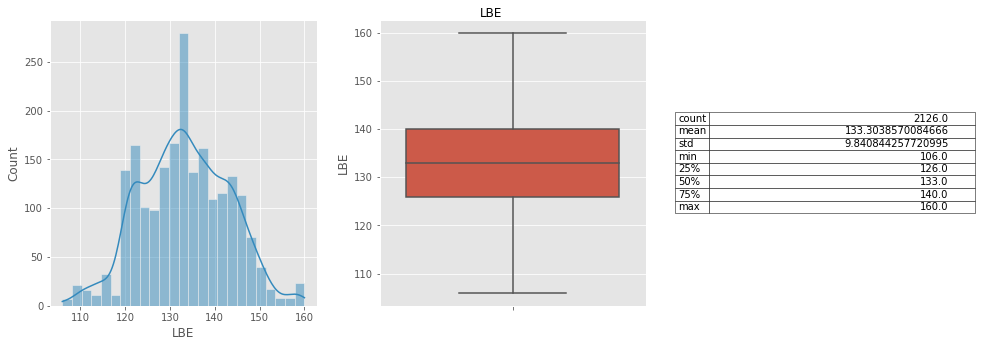

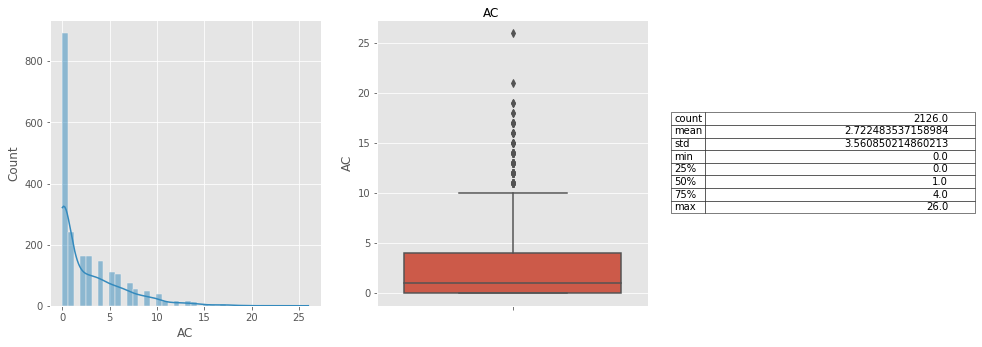

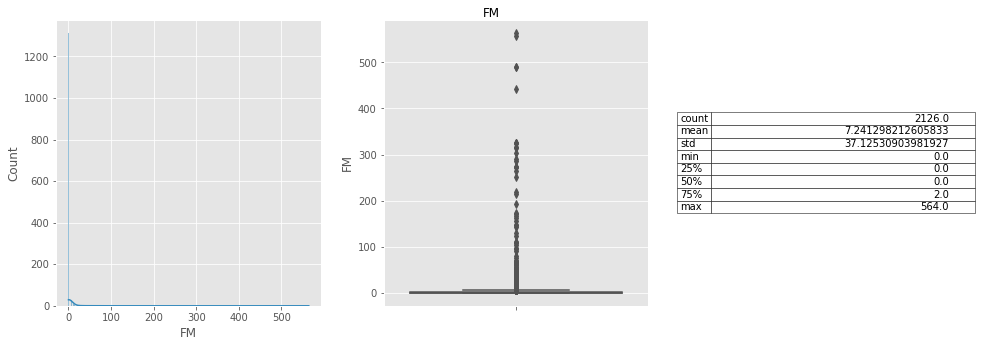

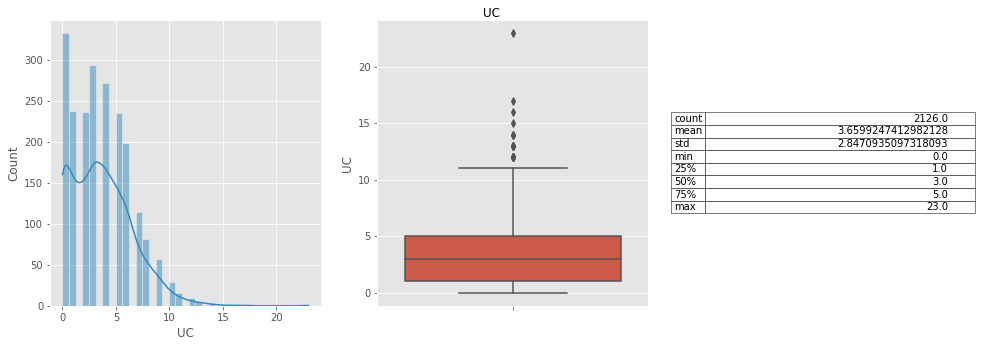

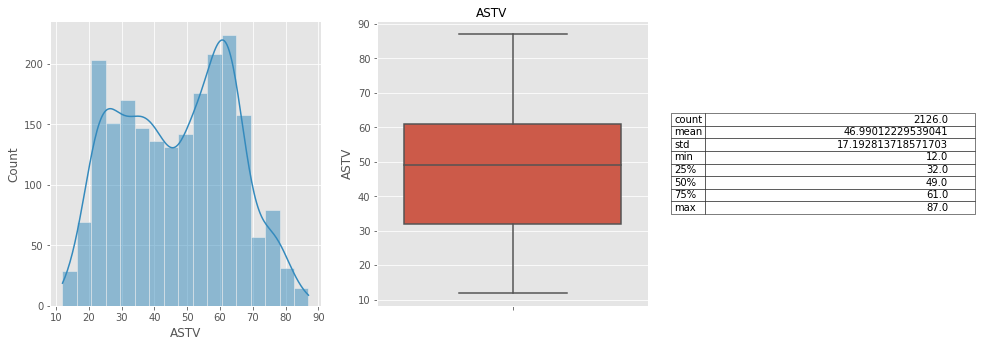

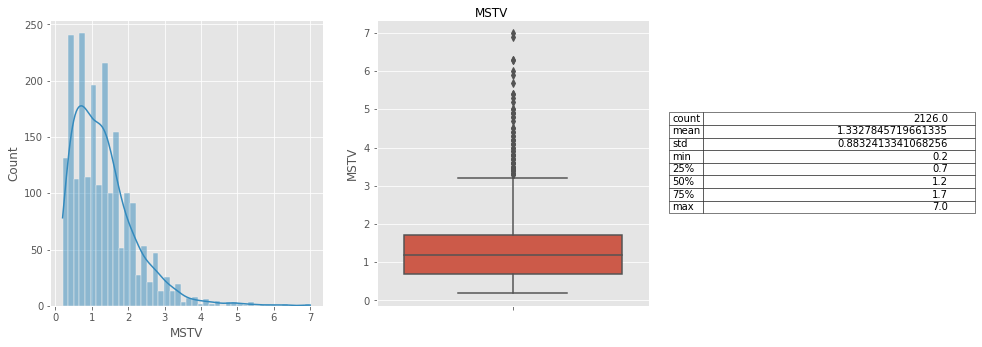

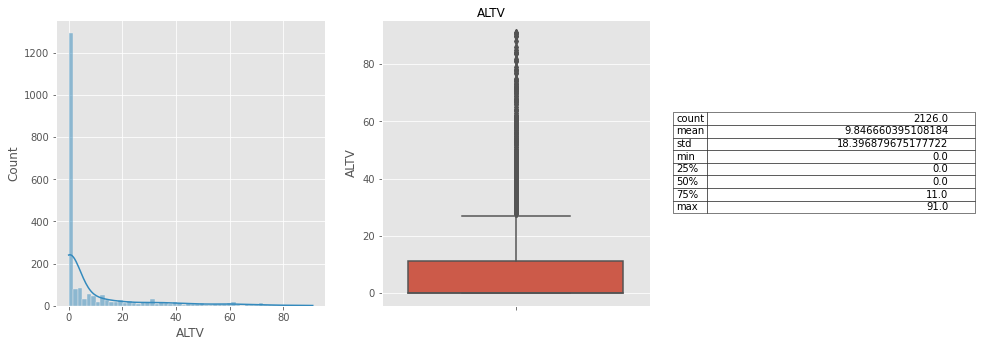

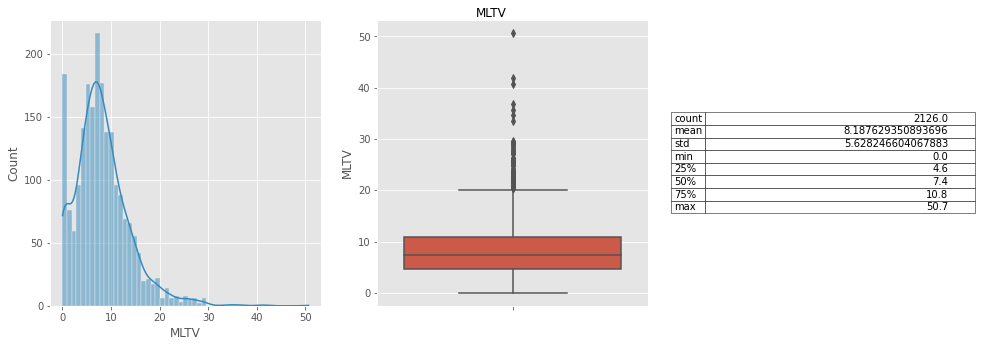

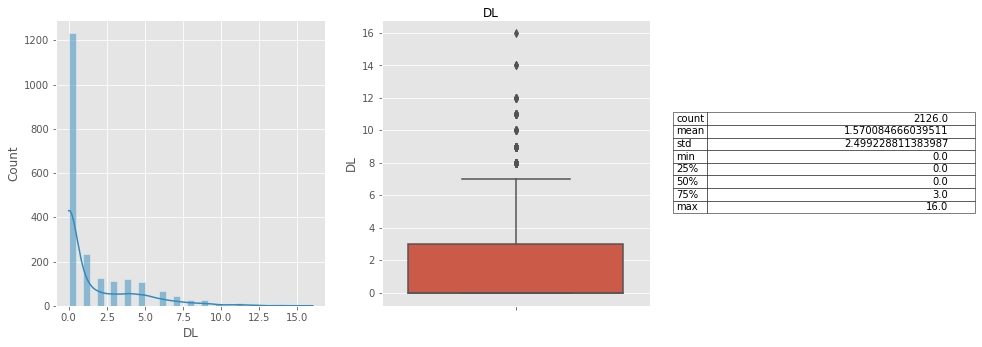

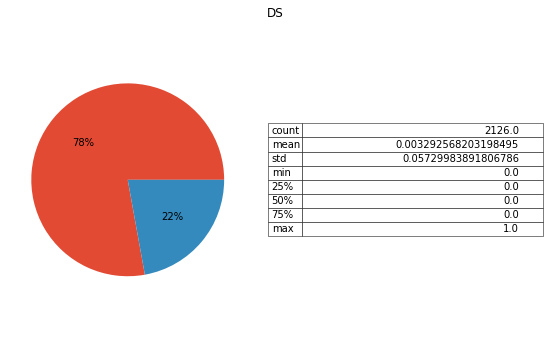

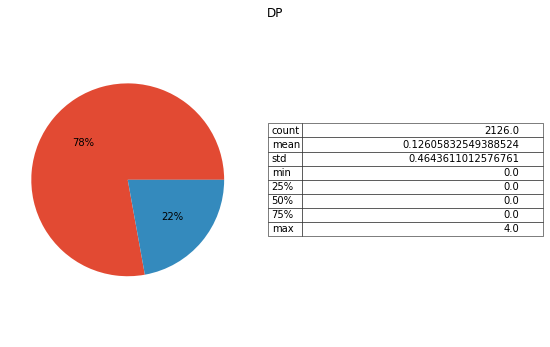

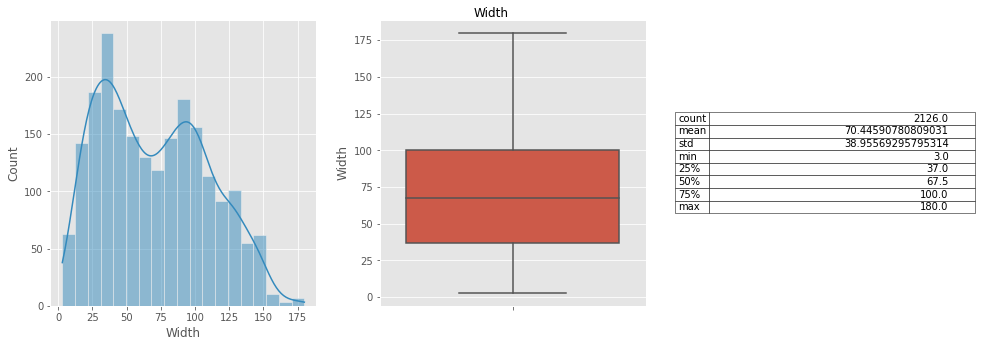

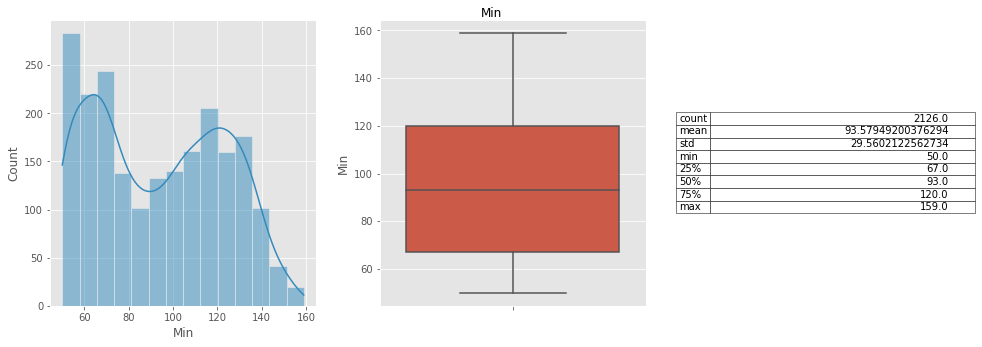

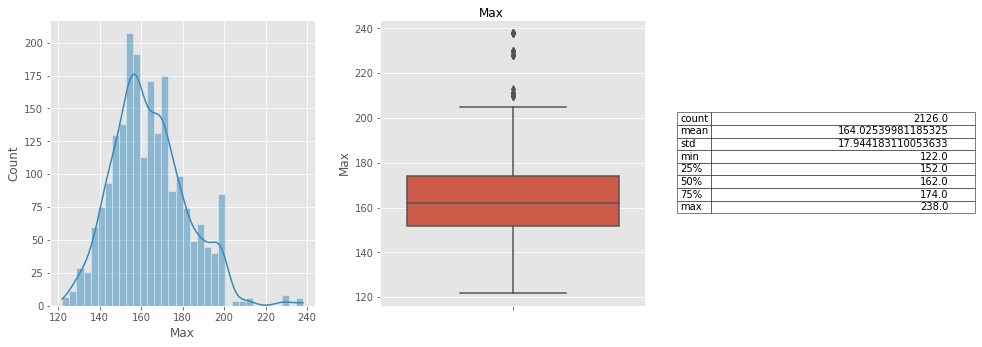

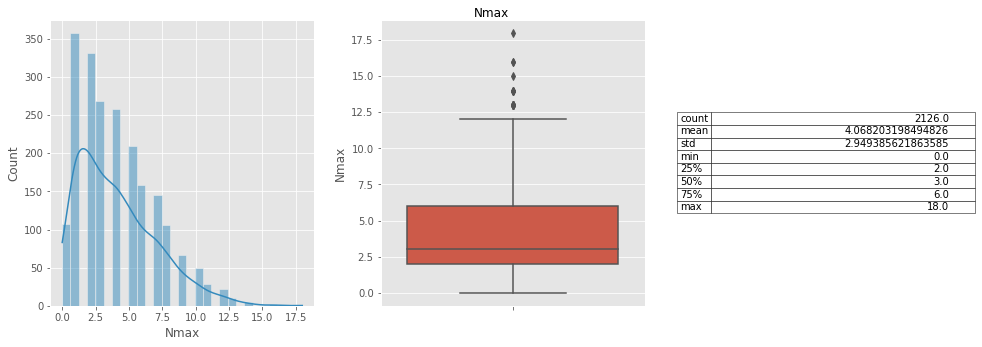

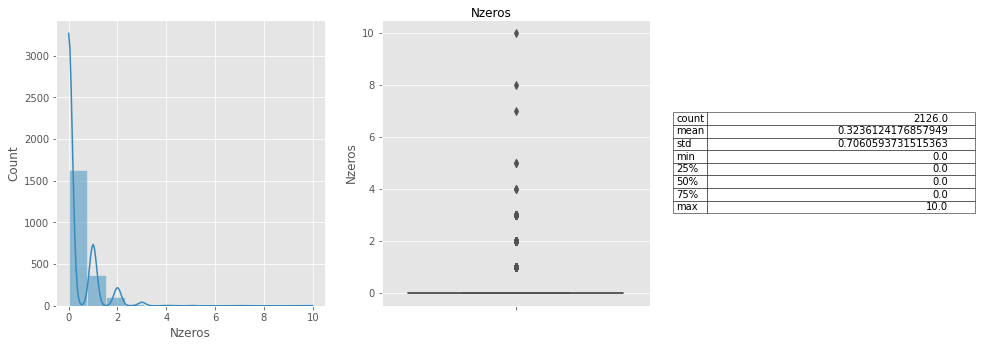

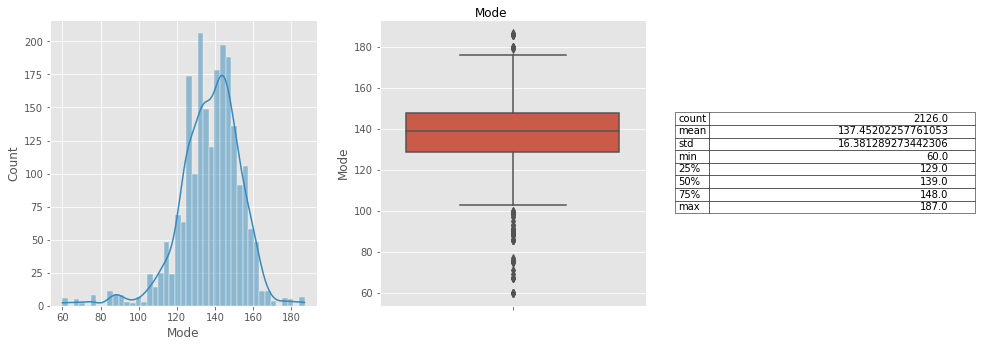

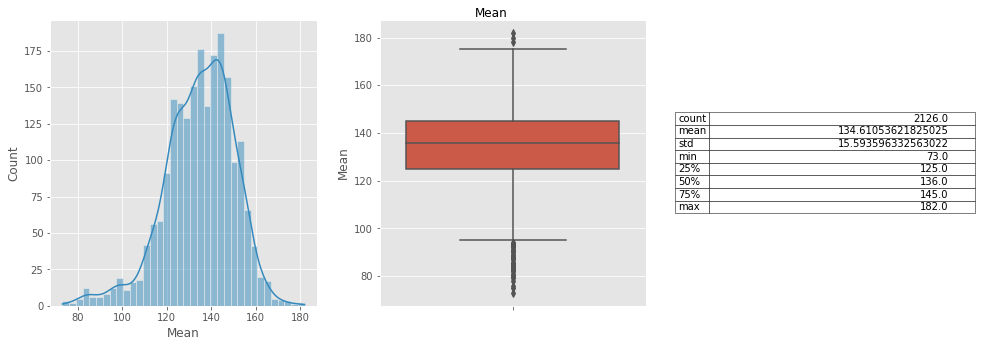

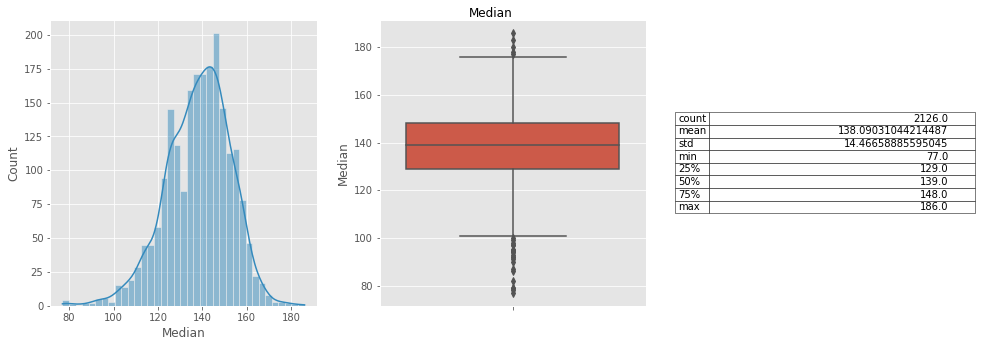

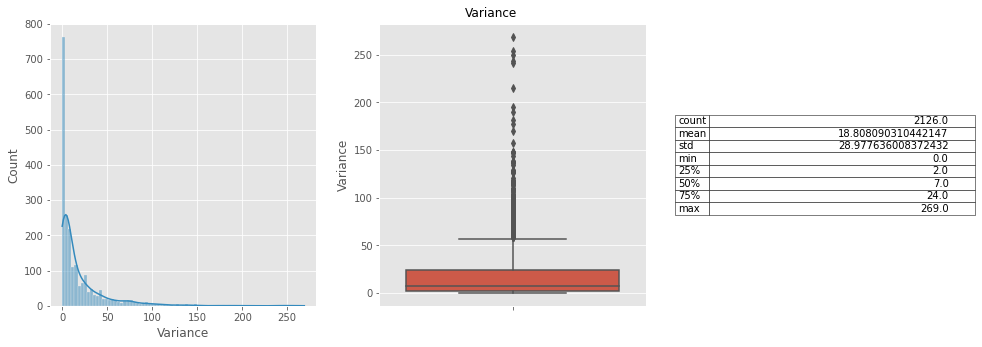

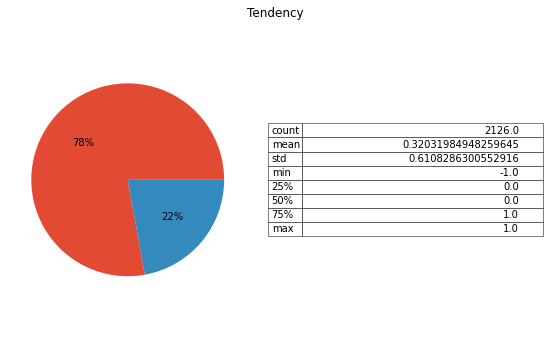

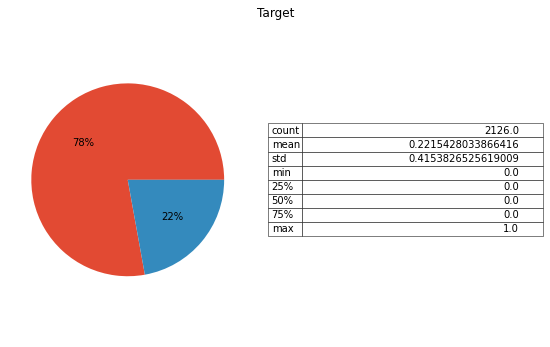

In [12]:
for var in list(data.columns):
  if var in CONTINUOUS_VARS:
    # Mostramos histograma y gráfico de caja
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,5))
    # Las medidas de centralización y posición irán en el tercer gráfico
    tblax = axes[2]
    plt.suptitle(var)
    sns.histplot(data = data, x=var, kde=True, ax=axes[0])
    sns.boxplot(data=data, y=var, ax=axes[1])
  else:
    # Variables discretas
    # Mostramos un gráfico de tarta
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,5))
    # Las medidas de centralización y posición irán en el tercer gráfico
    tblax = axes[1]
    plt.suptitle(var)
    a, b = data['Target'].value_counts()
    axes[0].pie([a, b], autopct="%1.0f%%")

  table = data[var].describe()
  tblax.table(list(zip(table.values)), loc="center", rowLabels=table.index)
  tblax.axis('off')
  plt.tight_layout(pad=2)

### Análisis de correlaciones

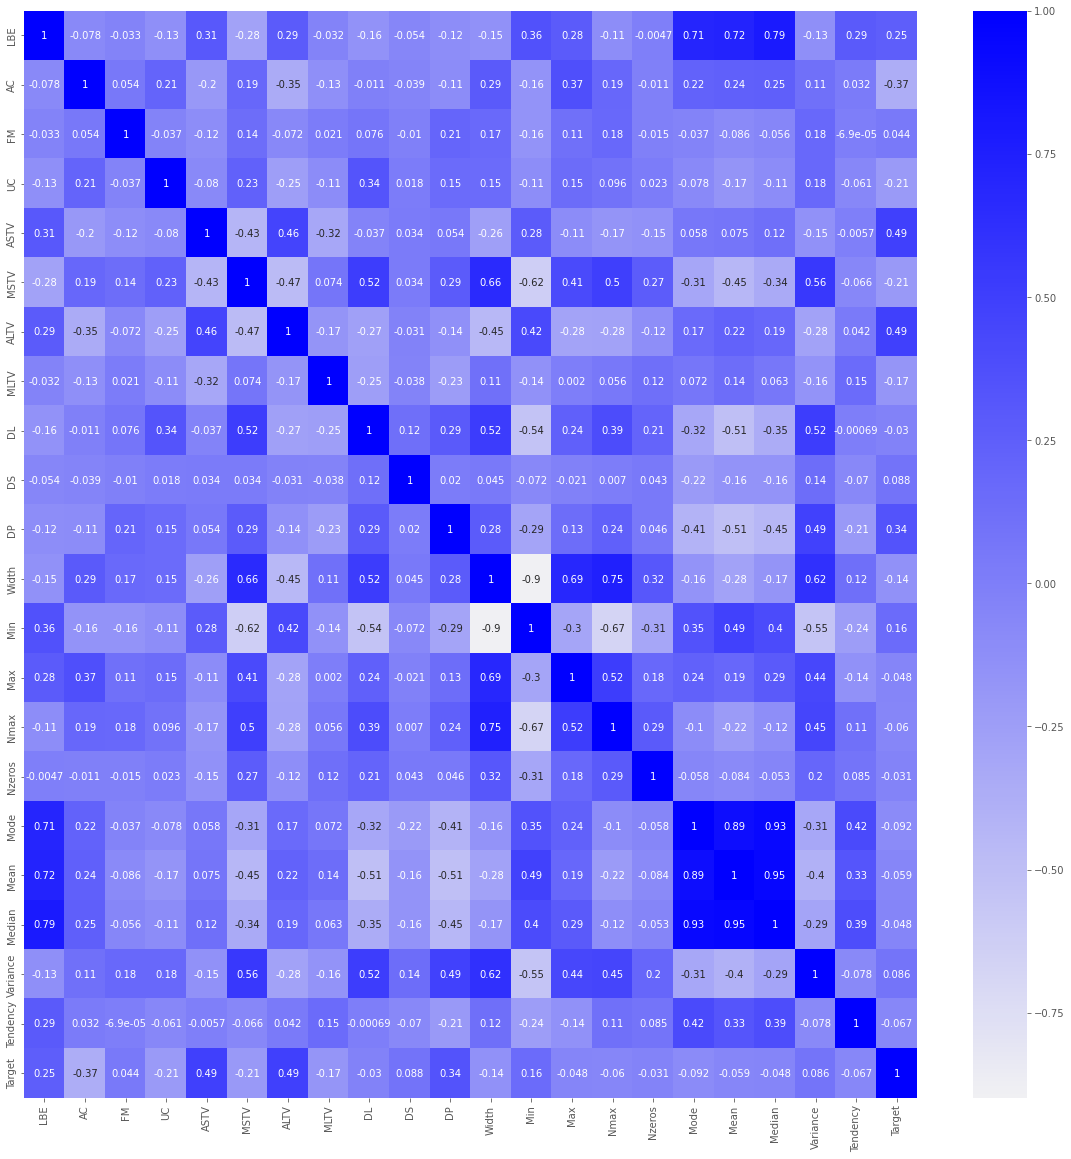

In [13]:
plt.figure(figsize=(20,20))
corr = data.corr()
cmap = sns.color_palette("light:b", as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)
plt.show()

### Relación univariante con la variable objetivo

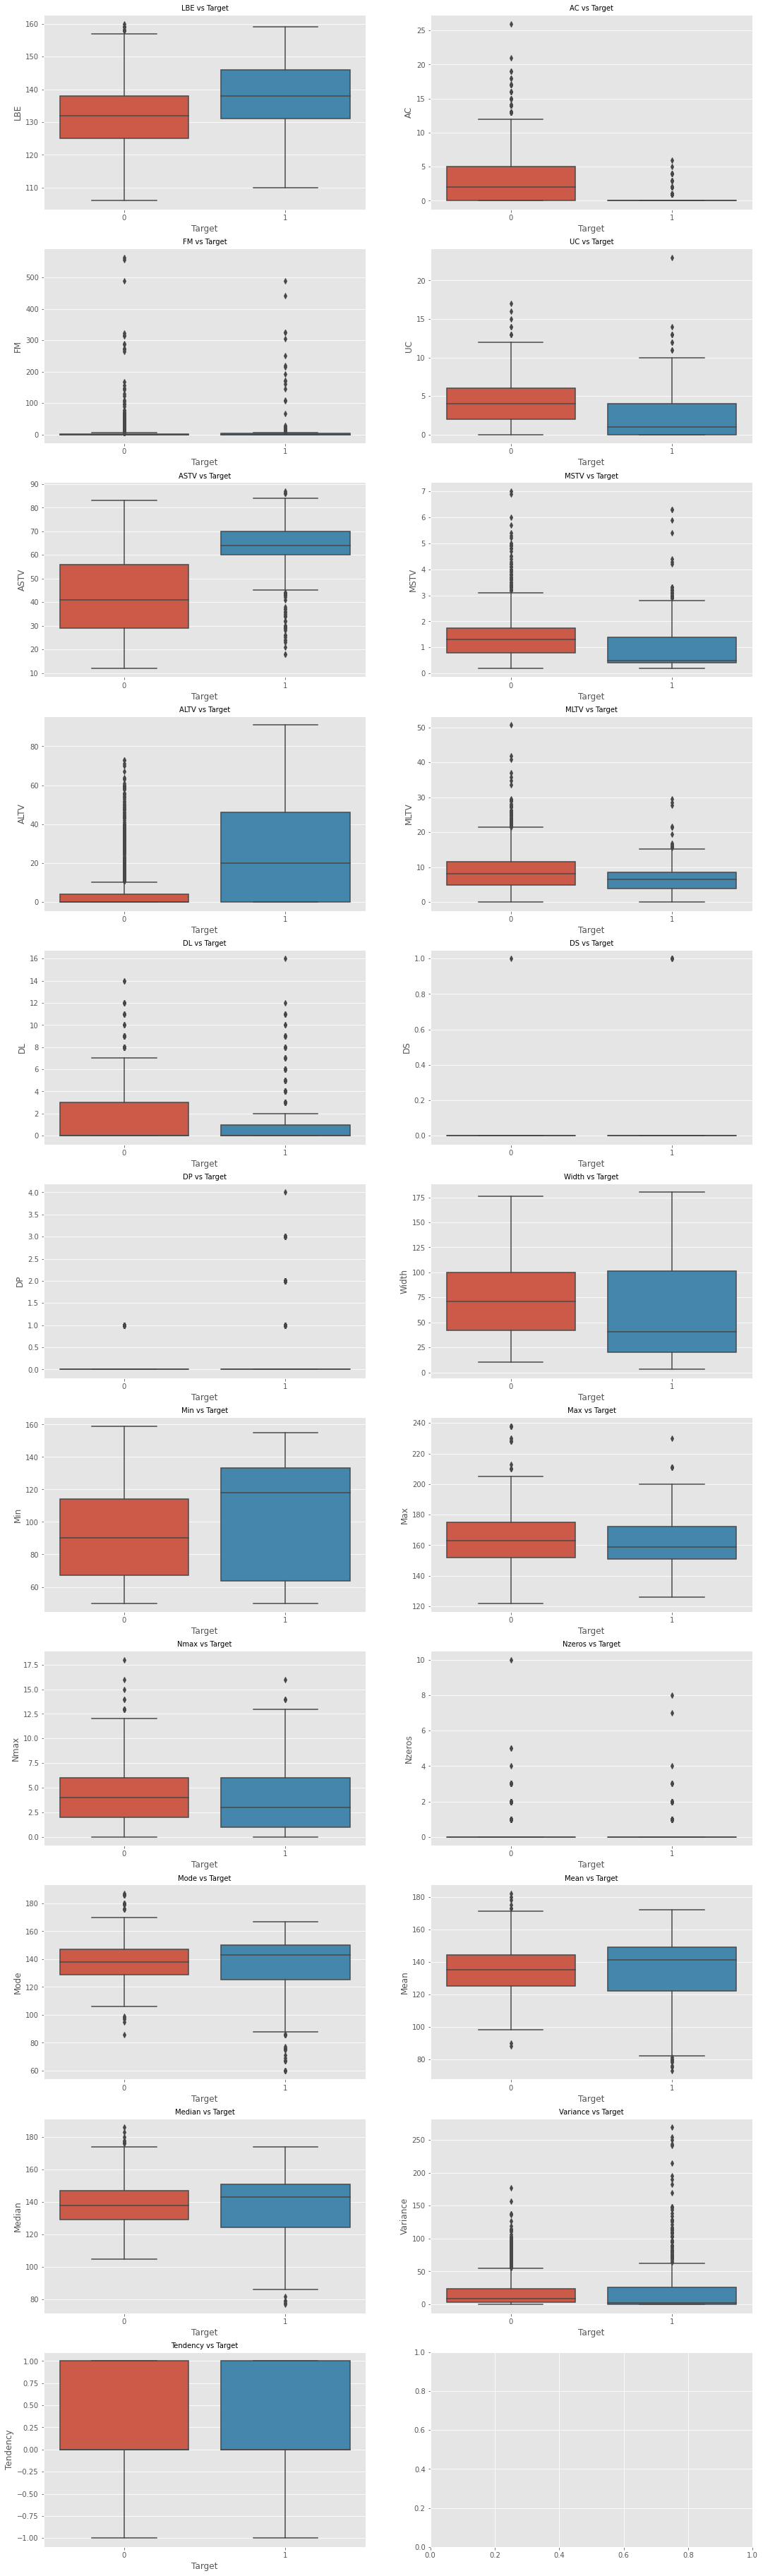

In [14]:
variables = list(data.columns[data.columns != "Target"])
ncols = 2
nrows = int(np.ceil(len(variables)/ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(9*ncols, 6*nrows))

for i, var in enumerate(variables):
  ax = axes[int(np.floor(i/ncols))][i%ncols]
  sns.boxplot(x = 'Target', y= var, data = data, ax=ax)
  ax.set_title(f"{var} vs Target")

## Ajuste del algoritmo Naive Bayes

### Muestreo

In [15]:
from sklearn.model_selection import train_test_split
X = data.loc[:, data.columns != "Target"]
y = data.loc[:, data.columns == "Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [16]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(425, 21) (425, 1)
(1701, 21) (1701, 1)


### Modelización

In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

modelNB = gnb.fit(X_train, y_train.values.ravel())
y_pred_train = modelNB.predict_proba(X_train) 
y_pred_test = modelNB.predict_proba(X_test)

In [18]:
print(y_pred_train.shape)
print(y_pred_test.shape)

(425, 2)
(1701, 2)


### Validación

In [19]:
from sklearn.metrics import roc_curve, auc
#
# Encapsulamos la generación de la curva ROC en una función reutilizable
#
def plot_ROC(y_train, y_test, pred_train, pred_test):
  # CURVA ROC Y AUC PARA TRAINING
  fpr_train, tpr_train, _ = roc_curve(y_train, pred_train[:, 1])
  roc_auc_train = auc(fpr_train, tpr_train)

  # CURVA ROC Y AUC PARA TEST
  fpr_test, tpr_test, _ = roc_curve(y_test, pred_test[:, 1])
  roc_auc_test = auc(fpr_test, tpr_test)

  # GRAFICA
  plt.figure()
  lw = 2

  plt.plot(fpr_train,tpr_train,color="darkgreen",lw=lw+1,label="ROC curve (area = %0.2f)" % roc_auc_train,)
  plt.plot(fpr_test,tpr_test,color="darkred",lw=lw+1,label="ROC curve (area = %0.2f)" % roc_auc_test,)

  plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC")
  plt.legend(loc="lower right")
  plt.show()


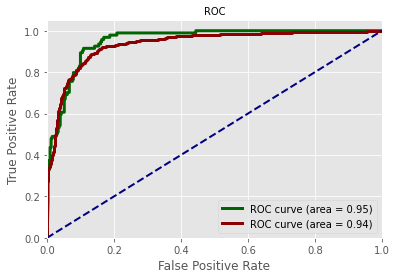

In [20]:
plot_ROC(
    y_train=y_train,
    y_test=y_test,
    pred_train=y_pred_train,
    pred_test=y_pred_test
    )

## Respuestas preguntas del sprint 2

### P1: Enumere las 3 variables explicativas que presentan mayor correlación con el target.

In [21]:
# Obtenemos los coeficientes de correlación de las variables respecto a Target
# Eliminamos la correlación de Target consigo misma
df_corr = data.corr()["Target"].to_frame().drop("Target")
df_corr.columns = ["r"]

# Calculamos el valor absoluto del coeficiente de correlación
# tan alta es una correlación de 0.9 como una de -0,9
df_corr["abs_r"] = df_corr.r.apply(np.abs)

# Usamos abs_r para obtener las variables con más correlación
df_corr.nlargest(3, "abs_r")

,r,abs_r
ASTV,0.493391,0.493391
ALTV,0.489400,0.489400
AC,-0.369470,0.369470


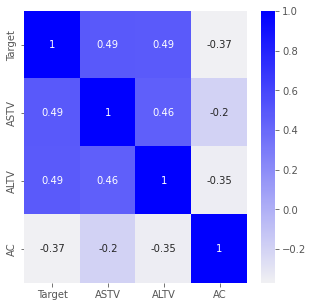

In [22]:
# Mostramos la matriz de correlación para estas tes variables y Target
variables = ["Target"] + list(df_corr.nlargest(3, "abs_r").index)
plt.figure(figsize=(5,5))
sns.heatmap(data.loc[:,variables].corr(), annot=True, cmap=cmap)
plt.show()

### P2: Cree un conjunto de entrenamiento y otro de test a partir del conjunto inicial de datos donde el conjunto de entrenamiento contenga el 60% de las observaciones

In [23]:
X = data.loc[:, data.columns != "Target"]
y = data.loc[:, data.columns == "Target"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.4, random_state = 0)

print(X_train2.shape, y_train2.shape)
print(X_test2.shape, y_test2.shape)

(1275, 21) (1275, 1)
(851, 21) (851, 1)


### P3: A partir del conjunto de entrenamiento ajuste un modelo a partir del algoritmo de Naive Bayes

In [26]:
gnb2 = GaussianNB()
modelNB2 = gnb2.fit(X_train2, y_train2.values.ravel())

y_pred_train2 = modelNB2.predict_proba(X_train2) 
y_pred_test2 = modelNB2.predict_proba(X_test2)

print(y_pred_train2.shape)
print(y_pred_test2.shape)

(1275, 2)
(851, 2)


### P4: Obtenga la curva ROC y el área bajo la curva para los conjuntos de entrenamiento y test

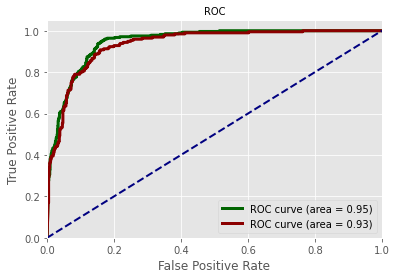

In [27]:
plot_ROC(y_train2, y_test2, y_pred_train2, y_pred_test2)